In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lasio
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
las = lasio.read(r'D:\Karim\15_9-19 BT2\STAT1990__30-1__15-9-19_SR__COMPOSITE__1.LAS')

In [3]:
df= las.df()

In [4]:
for count, par in enumerate(las.curves):
    print (f"curve :{par.mnemonic} \t Unit :{par.unit} \t The describtion :   {par.descr} ")
print (f'There is {count+1} curves in this log file') 

curve :DEPT 	 Unit :M 	 The describtion :   1  DEPTH 
curve :AC 	 Unit :US/F 	 The describtion :   2  Sonic Transit Time (Slowness) 
curve :CALI 	 Unit :IN 	 The describtion :   3  Caliper 
curve :DEN 	 Unit :G/CC 	 The describtion :   4  Bulk Density 
curve :GR 	 Unit :GAPI 	 The describtion :   5  Gamma Ray 
curve :NEU 	 Unit :% 	 The describtion :   6  Neutron Porosity 
curve :RDEP 	 Unit :OHMM 	 The describtion :   7  Deep Resistivity 
curve :RMED 	 Unit :OHMM 	 The describtion :   8  Medium Resistivity 
There is 8 curves in this log file


In [5]:
df.reset_index(inplace= True)

In [6]:
df.rename(columns=({'DEPT':'Depth','CALI':'Caliper','NEU':'Neutron','DEN':'Density'}),inplace = True)
df.head()

,Depth,AC,Caliper,Density,GR,Neutron,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


(4500.0, 4200.0)

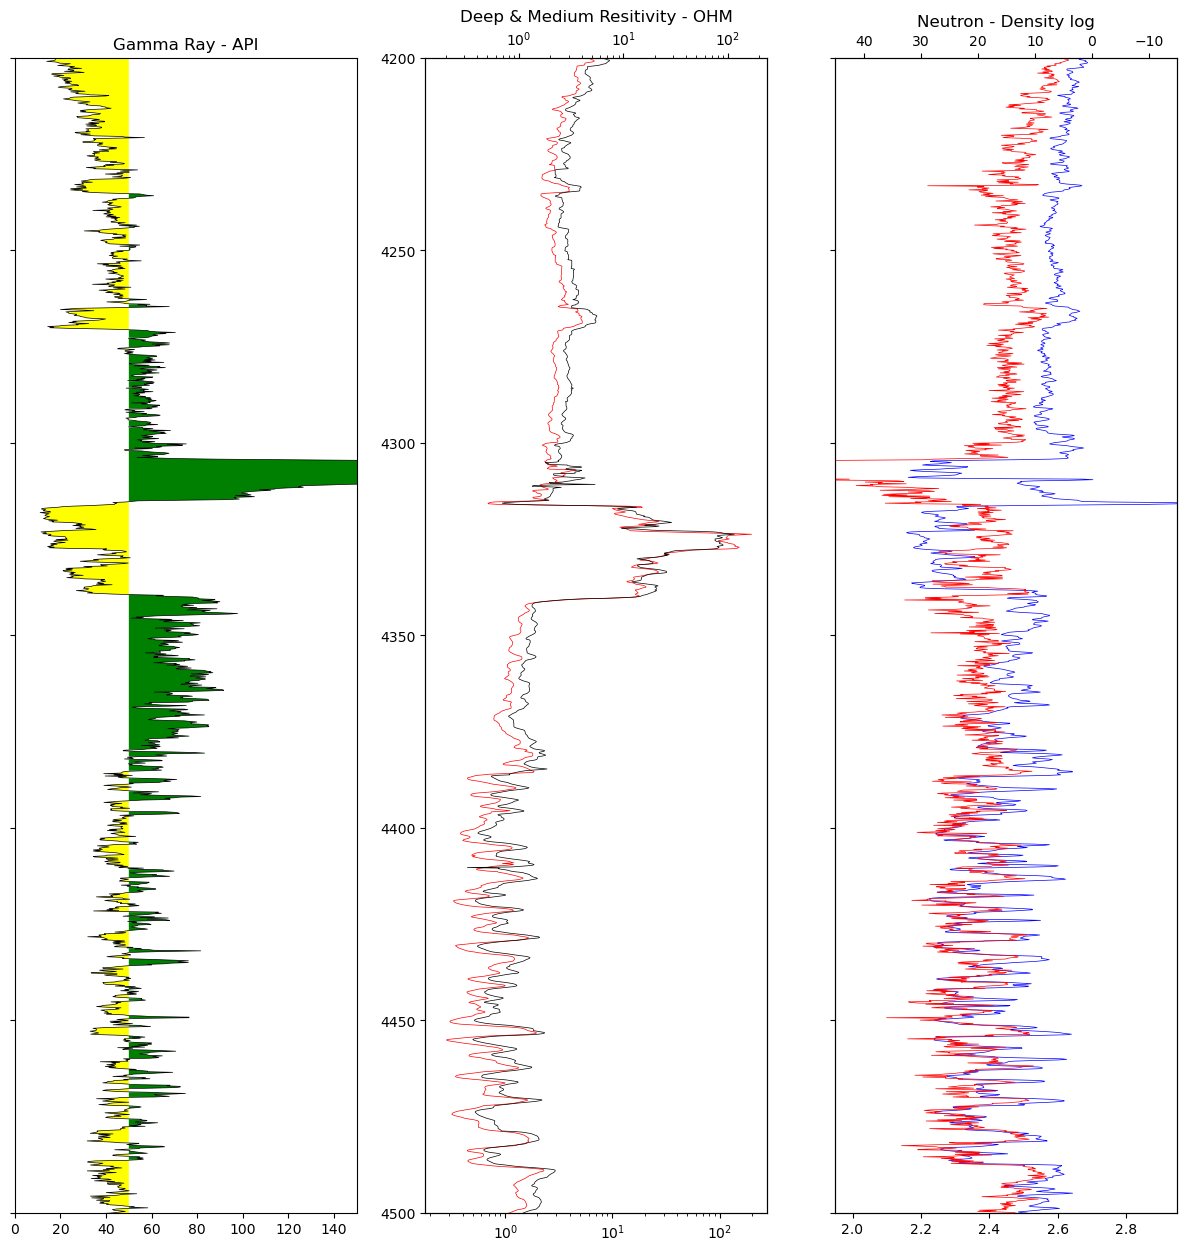

In [7]:
plt.figure(figsize = (15,15))
axis1 = plt.subplot2grid((3,3), (0,0), rowspan = 3)
axis2 = plt.subplot2grid((3,3), (0,1), rowspan = 3)
axis3 = plt.subplot2grid((3,3), (0,2), rowspan = 3)
axis4 = axis2.twiny()
axis5 = axis3.twiny()
for log in [axis1 , axis3]:
    plt.setp(log.get_yticklabels(), visible=False)

# Gamma Ray log
axis1.plot('GR','Depth' , data = df , lw = 0.5 , c= 'black' )
axis1.set_xlim(0,150)
axis1.set_ylim(4500,4200)
axis1.set_title('Gamma Ray - API')
axis1.fill_betweenx(df['Depth'] ,50, df['GR'] , where= df['GR']<=50  ,facecolor = 'yellow') # non shale if the GR lower than 50
axis1.fill_betweenx(df['Depth'] ,50, df['GR'] , where= df['GR']>=50  ,facecolor = 'green') # non shale if the GR higher than 50

# Deep Resistivity log
axis2.plot('RDEP','Depth', data = df , lw = 0.5 , c = 'red')
axis2.set_ylim(4500,4200)
axis2.semilogx()
axis2.set_title('Deep & Medium Resitivity - OHM')

# Medium Resitivity log
axis4.plot('RMED','Depth', data = df , lw = 0.5 , c = 'black')
axis4.set_ylim(4500,4200)
axis4.semilogx()

# Density log
axis3.plot('Density','Depth', data = df , lw = 0.5 , c = 'blue')
axis3.set_xlim(1.95,2.95)
axis3.set_ylim(4500,4200)
axis3.set_title('Neutron - Density log')

# Neutron log
axis5.plot('Neutron','Depth', data = df , lw = 0.5 , c = 'red')
axis5.set_xlim(45,-15)
axis5.set_ylim(4500,4200)


In [8]:
df.dropna(inplace = True)

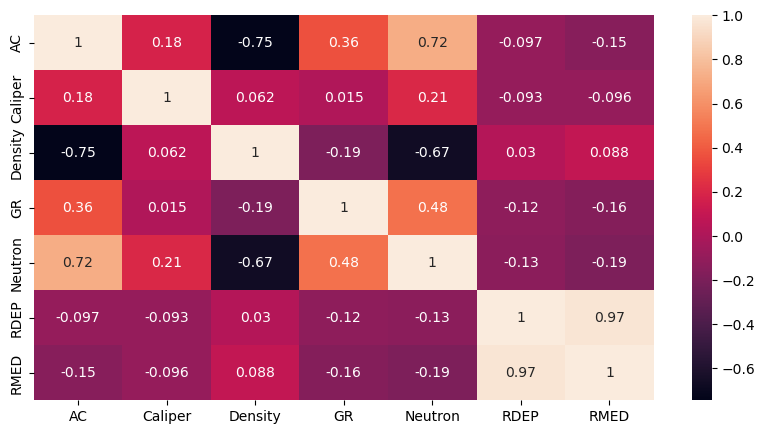

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [11]:
X = df[['AC','GR','Neutron']]
Y = df['Density']
x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,random_state=1111)


In [12]:
x_train_const = sm.add_constant(x_train)

model_fitted = sm.OLS(y_train,x_train_const).fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2950.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:11:08   Log-Likelihood:                 4771.2
No. Observations:                5560   AIC:                            -9534.
Df Residuals:                    5556   BIC:                            -9508.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8867      0.007    408.603      0.0

In [13]:
x_test_const = sm.add_constant(x_test)

test_prediction = model_fitted.predict(x_test_const)

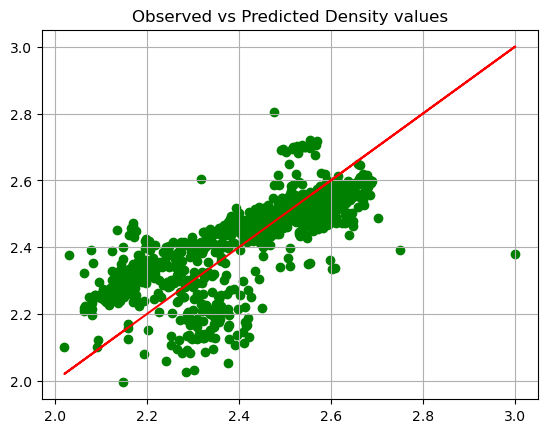

In [14]:
plt.scatter(y_test, test_prediction , color = 'green')
plt.plot(y_test,y_test,color = 'red')
plt.title('Observed vs Predicted Density values')
plt.grid()
plt.show()

In [15]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6*len(df)), int(0.8*len(df))]) #splitting the data 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
def scale_dataset(dataframe, oversample = False) :
    x = dataframe[['AC','GR','Neutron']] 
    y = dataframe['Density'] 
    if pd.api.types.is_numeric_dtype(y):
        y = pd.cut(y, bins=3, labels=False)
    if oversample : #just to keep sampling from the lower data to be equal
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    scaler = StandardScaler()
    x= scaler.fit_transform(x) # standrdization the numbers
    data = np.hstack((x , np.reshape(y,(-1,1)))) #stacking the data to be X agianst Y
    return data , x , y

In [17]:
train , x_train , y_train = scale_dataset(train, oversample = True)
valid , x_valid , y_valid = scale_dataset(valid, oversample = False)
test , x_test , y_test = scale_dataset(test, oversample = False)

## KNN Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Train the model
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train , y_train)
# Predicts
y_predict = knn_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       365
           1       0.94      0.86      0.90      1014
           2       0.07      0.67      0.13        12

    accuracy                           0.86      1391
   macro avg       0.63      0.80      0.63      1391
weighted avg       0.92      0.86      0.88      1391



## Gaussian

In [19]:
from sklearn.naive_bayes import GaussianNB
bayen_model = GaussianNB()
bayen_model.fit(x_train , y_train)
y_predict = bayen_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       365
           1       0.89      0.37      0.53      1014
           2       0.02      0.75      0.03        12

    accuracy                           0.51      1391
   macro avg       0.56      0.67      0.46      1391
weighted avg       0.85      0.51      0.60      1391



## Linear Regression


In [20]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)
y_predict = lg_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       365
           1       0.94      0.51      0.66      1014
           2       0.02      0.75      0.04        12

    accuracy                           0.62      1391
   macro avg       0.59      0.72      0.52      1391
weighted avg       0.90      0.62      0.71      1391



## SVM

In [21]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_predict = svm_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       365
           1       0.98      0.69      0.81      1014
           2       0.04      0.75      0.07        12

    accuracy                           0.76      1391
   macro avg       0.61      0.80      0.59      1391
weighted avg       0.93      0.76      0.82      1391



## Neural Network

C:\Users\Reda\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test loss: 0.1491413563489914
Test MAE: 0.29600387811660767


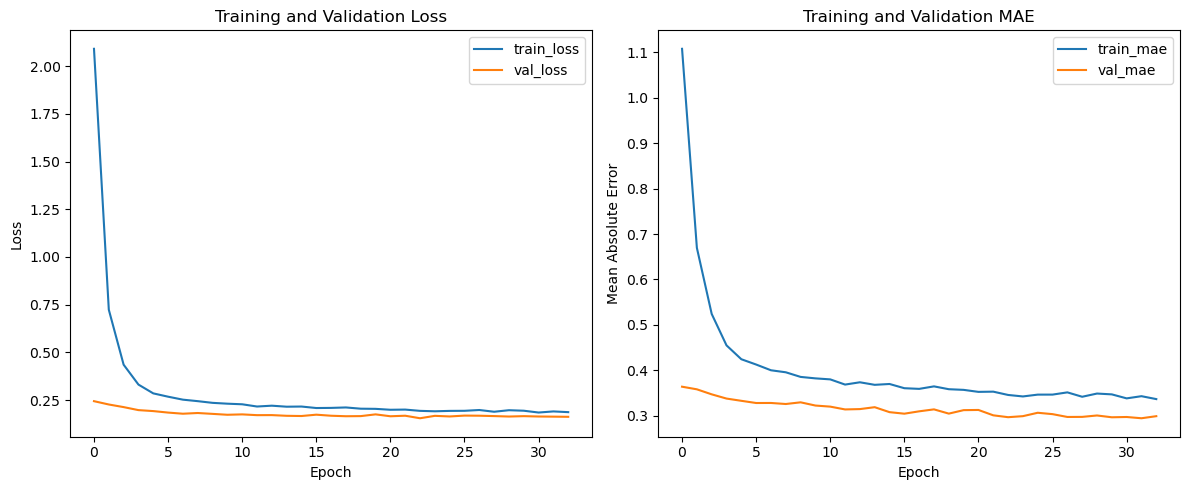

In [22]:
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming `df` is your DataFrame containing the well log data

# Splitting the data into training, validation, and test sets
train, temp = train_test_split(df, test_size=0.3, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

def preprocess_dataset(dataframe):
    # Feature and target separation
    x = dataframe[['AC', 'GR', 'Neutron']].values
    y = dataframe['Density'].values
    
    # Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_poly = poly.fit_transform(x)
    
    # Standardization
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_poly)
    
    # Dimensionality Reduction
    pca = PCA(n_components=5)  # Adjust components based on explained variance
    x_reduced = pca.fit_transform(x_scaled)
    
    return x_reduced, y
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Callbacks for learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[reduce_lr, early_stopping], verbose=0)

# Evaluate the model
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest loss: {test_loss}')
print(f'Test MAE: {test_mae}')

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')

plt.tight_layout()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model training
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Model evaluation
lr_y_pred = lr_model.predict(x_valid)
lr_mse = mean_squared_error(y_valid, lr_y_pred)
lr_mae = mean_absolute_error(y_valid, lr_y_pred)
print(f'Linear Regression - MSE: {lr_mse}, MAE: {lr_mae}')


Linear Regression - MSE: 0.31021626283080456, MAE: 0.42250620560862273


In [25]:
from sklearn.tree import DecisionTreeRegressor

# Model training
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

# Model evaluation
dt_y_pred = dt_model.predict(x_valid)
dt_mse = mean_squared_error(y_valid, dt_y_pred)
dt_mae = mean_absolute_error(y_valid, dt_y_pred)
print(f'Decision Tree - MSE: {dt_mse}, MAE: {dt_mae}')


Decision Tree - MSE: 0.2827338129496403, MAE: 0.26834532374100717


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Model training
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Model evaluation
rf_y_pred = rf_model.predict(x_valid)
rf_mse = mean_squared_error(y_valid, rf_y_pred)
rf_mae = mean_absolute_error(y_valid, rf_y_pred)
print(f'Random Forest - MSE: {rf_mse}, MAE: {rf_mae}')


Random Forest - MSE: 0.20371294964028777, MAE: 0.26040287769784176


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Model training
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)

# Model evaluation
gb_y_pred = gb_model.predict(x_valid)
gb_mse = mean_squared_error(y_valid, gb_y_pred)
gb_mae = mean_absolute_error(y_valid, gb_y_pred)
print(f'Gradient Boosting - MSE: {gb_mse}, MAE: {gb_mae}')


Gradient Boosting - MSE: 0.17609787106586866, MAE: 0.2840280637601638


In [28]:
from sklearn.svm import SVR

# Model training
svr_model = SVR()
svr_model.fit(x_train, y_train)

# Model evaluation
svr_y_pred = svr_model.predict(x_valid)
svr_mse = mean_squared_error(y_valid, svr_y_pred)
svr_mae = mean_absolute_error(y_valid, svr_y_pred)
print(f'SVR - MSE: {svr_mse}, MAE: {svr_mae}')


SVR - MSE: 0.18826880086846773, MAE: 0.3025794028889473


In [29]:
import xgboost as xgb

# Model training
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(x_train, y_train)

# Model evaluation
xgb_y_pred = xgb_model.predict(x_valid)
xgb_mse = mean_squared_error(y_valid, xgb_y_pred)
xgb_mae = mean_absolute_error(y_valid, xgb_y_pred)
print(f'XGBoost - MSE: {xgb_mse}, MAE: {xgb_mae}')


XGBoost - MSE: 0.2178264189738202, MAE: 0.2907537898517194


In [30]:
import lightgbm as lgb

# Model training
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(x_train, y_train)

# Model evaluation
lgb_y_pred = lgb_model.predict(x_valid)
lgb_mse = mean_squared_error(y_valid, lgb_y_pred)
lgb_mae = mean_absolute_error(y_valid, lgb_y_pred)
print(f'LightGBM - MSE: {lgb_mse}, MAE: {lgb_mae}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 8670, number of used features: 3
[LightGBM] [Info] Start training from score 1.000000
LightGBM - MSE: 0.19198226432661403, MAE: 0.266375662205341


In [31]:
import catboost as cat

# Model training
cat_model = cat.CatBoostRegressor(random_seed=42, verbose=0)
cat_model.fit(x_train, y_train)

# Model evaluation
cat_y_pred = cat_model.predict(x_valid)
cat_mse = mean_squared_error(y_valid, cat_y_pred)
cat_mae = mean_absolute_error(y_valid, cat_y_pred)
print(f'CatBoost - MSE: {cat_mse}, MAE: {cat_mae}')


CatBoost - MSE: 0.2003617432707418, MAE: 0.28554873775397194


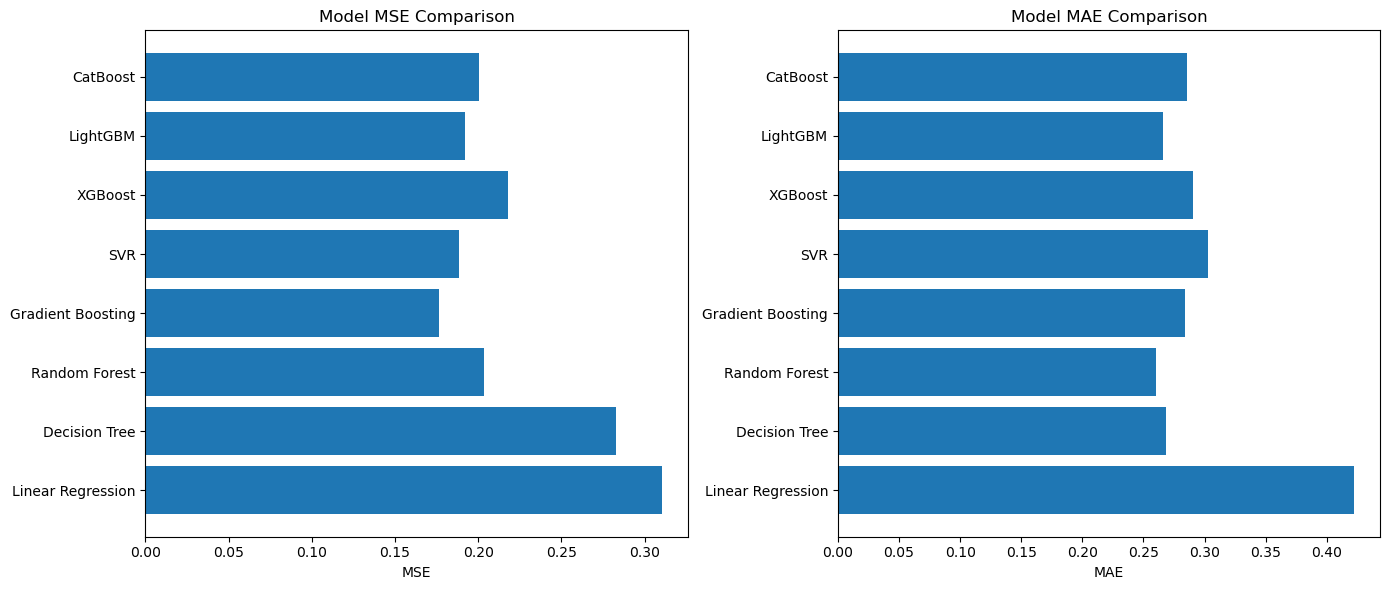

In [32]:
results = {
    "Linear Regression": {"MSE": lr_mse, "MAE": lr_mae},
    "Decision Tree": {"MSE": dt_mse, "MAE": dt_mae},
    "Random Forest": {"MSE": rf_mse, "MAE": rf_mae},
    "Gradient Boosting": {"MSE": gb_mse, "MAE": gb_mae},
    "SVR": {"MSE": svr_mse, "MAE": svr_mae},
    "XGBoost": {"MSE": xgb_mse, "MAE": xgb_mae},
    "LightGBM": {"MSE": lgb_mse, "MAE": lgb_mae},
    "CatBoost": {"MSE": cat_mse, "MAE": cat_mae}
}

# Plot MSE
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(list(results.keys()), [v["MSE"] for v in results.values()])
plt.xlabel('MSE')
plt.title('Model MSE Comparison')

# Plot MAE
plt.subplot(1, 2, 2)
plt.barh(list(results.keys()), [v["MAE"] for v in results.values()])
plt.xlabel('MAE')
plt.title('Model MAE Comparison')

plt.tight_layout()
plt.show()
